# EaseMyTrip Airfare Research & Prediction

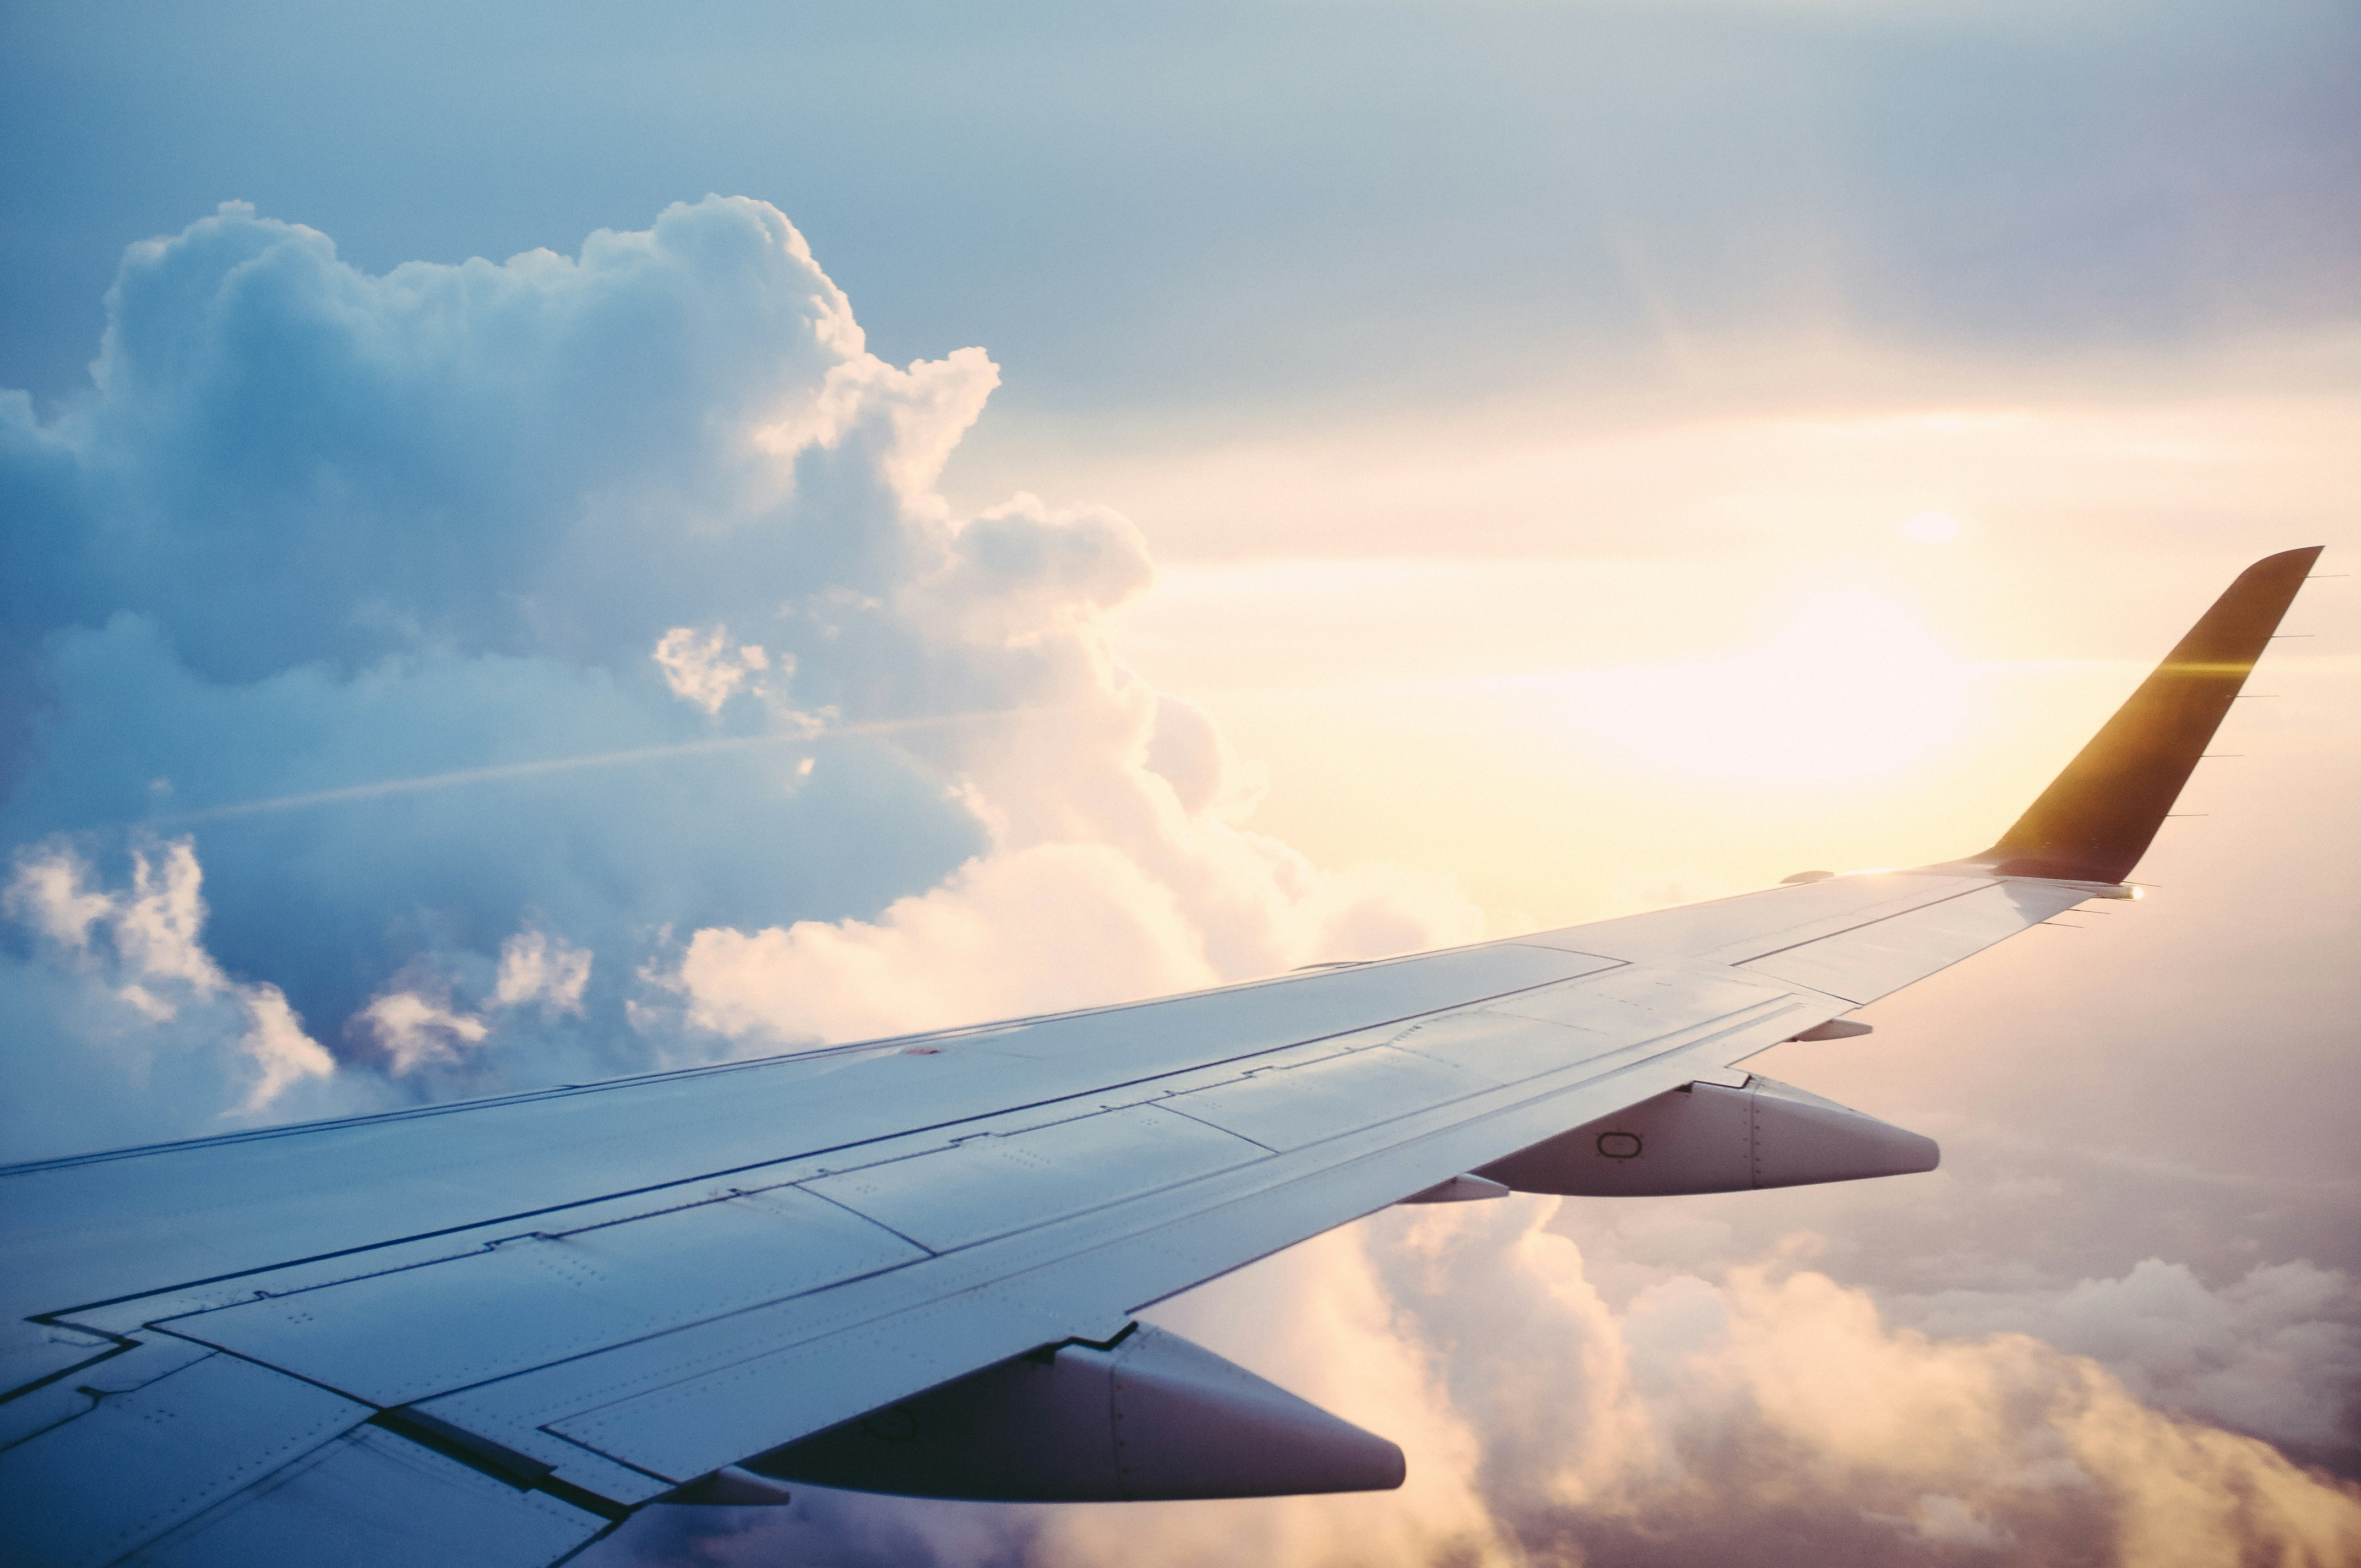

## Approach

* [Install Packages](#Install-Packages)
* [Import Libraries](#Import-Libraries)
* [Load Dataset](#Load-Dataset)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Descriptive Analysis](#Descriptive-Analysis)
  1. [What is the frequency of each flights in each city?](#What-is-the-frequency-of-each-flights-in-each-city?)
  2. [Does price vary with airlines?](#Does-price-vary-with-airlines?)
  3. [How is the price affected when booked over days before the flight?](#How-is-the-price-affected-when-booked-over-the-days-before-the-flight?)
  4. [Does the ticket price change based on the departure time and arrival time?](#Does-the-ticket-price-change-based-on-the-departure-time-and-arrival-time?)
* [One-Hot Encoding & Integer Encoding](#One-Hot-Encoding-&-Integer-Encoding)
* [Correlation Analysis](#Correlation-Analysis)
  1. [Does prices depend on source city?](#Does-prices-depend-on-source-city-?)
  2. [Does prices depend on destination city?](#Does-prices-depend-on-destination-city-?)
* [VIF Analyis](#VIF-Analysis)
* [Train - Test Split](#Train---Test-Split)
* [Linear Regression](#Linear-Regression)
* [Prediction](#Prediction)
* [Insights](#In)

## Install Packages

In [ ]:
!pip install pandas --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet
!pip install scikit_learn --quiet
!pip install statsmodels --quiet
!pip install scipy --quiet
!pip install numpy --quiet
!pip install joblib --quiet

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy
import pickle
import joblib
import numpy as np

## Load Dataset

In [3]:
df = pd.read_csv("../data/Flight_Price_Prediction.csv")
df

Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           Mumbai   Economy      2.17          1   5953  
1             Morning           Mumbai   Economy      2.33          1   5953  
2       Early_Morning           Mumbai   Economy      2.17          1   5956  
3           Afternoon           Mumbai   Economy      2.25          1   5955  
4             Morning           Mumbai   Economy      2.33          1   5955  
...               ...              ...       ...       ...        ...    ...  
300148        Evening        Hyderabad  Business     10.08         49  69265  
300149          Night        Hyderabad  Business     10.42         49  77105  
300150          Night        Hyderabad  Business     13.83         49  79099  
300151        Evening        Hyderabad  Business     10.00         49  81585  
300152        Evening        Hyderabad  Business     10.08         49  81585  

[300153 rows x 12 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
# Dropping first column
df.drop(columns=df.columns[0], inplace=True)

## Data Dictionary

* Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
* Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
* Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
* Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
* Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
* Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
* Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
* Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
* Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
* Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
* Price: Target variable stores information of the ticket price.

## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


- There are total 300153 rows and 11 columns
- There are no null values
- Out of 11 columns, 8 are objects, 1 is float and 2 are int types

## Descriptive Analysis

In [7]:
df.describe()

duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000

- Duration varies from 0.83 hours to 49.83 hours with average of 12.22 hours flight time
- Days Left varies from 1 day to 49 days with average of 26 days
- Price varies from 1105 to 12,3071 with average of 20,889

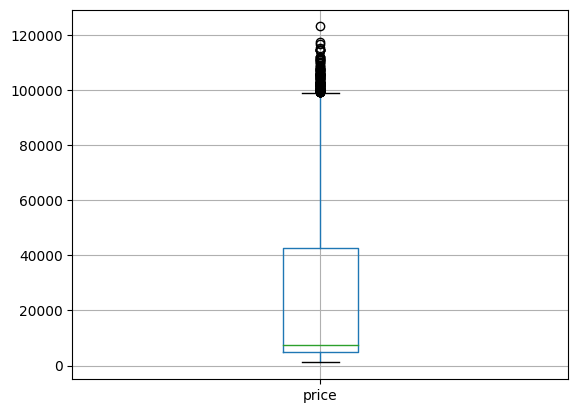

In [8]:
boxplot = df[['price']].boxplot(return_type='dict')

boxplot['whiskers'][1].get_ydata()
plt.show()

In [9]:
df[df['price'] > 98972][['airline', 'class']].value_counts()

airline  class   
Vistara  Business    123
Name: count, dtype: int64

- All the 123 points above 100,000 price are from vistara airline's business class.
- These cases can be taken as special and outlier cases as these deviate from the usual trend/range
- These cases of prices > 98,972 can be removed as outliers

In [10]:
df = df[df['price'] < 98972]

In [11]:
df.describe(include="object")

airline  flight source_city departure_time   stops arrival_time  \
count    300029  300029      300029         300029  300029       300029   
unique        6    1561           6              6       3            6   
top     Vistara  UK-706       Delhi        Morning     one        Night   
freq     127735    3227       61316          71102  250767        91488   

       destination_city    class  
count            300029   300029  
unique                6        2  
top              Mumbai  Economy  
freq              59067   206666

In [12]:
for ob in df.describe(include="object"):
    print(ob, ":", df[ob].unique())

airline : ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight : ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
source_city : ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time : ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops : ['zero' 'one' 'two_or_more']
arrival_time : ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city : ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class : ['Economy' 'Business']


- Airline has 6 unique categories
- There are 1561 flights in the dataset
- Flights operate betwene 6 cities only
- There are 6 departure and arrival times
- 3 categories for stops
- 2 categories of class

### What is the frequency of each flights in each city?

In [13]:
flight_counts = df.groupby(['source_city', 'airline'])['airline'].count()
flight_counts_df = flight_counts.unstack()
flight_counts_df

airline      AirAsia  Air_India  GO_FIRST  Indigo  SpiceJet  Vistara
source_city                                                         
Bangalore       3364      12052      4498    7080      1255    23806
Chennai         1498       9912      1289    6746      1219    18014
Delhi           4387      17063      5724    8277      2524    23341
Hyderabad       1844      11088      2504    6215       332    18821
Kolkata         2829      12400      3590    7296      1947    18245
Mumbai          2176      18377      5568    7506      1734    25508

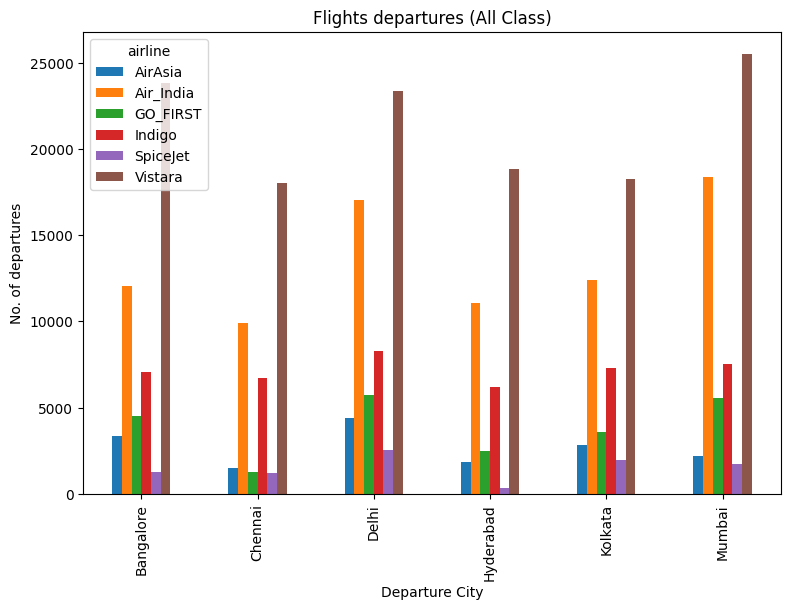

In [14]:
flight_counts_df.plot(figsize=(9,6), kind='bar')
plt.title("Flights departures (All Class)")
plt.xlabel("Departure City")
plt.ylabel("No. of departures")
plt.show()

- Vistara has the highest number of departures in every city, followed by Air India.
- SpiceJet has the least number of departure flights from any citites.

### Does price vary with airlines?

class          Business      Economy
airline                             
AirAsia             NaN  4091.072742
Air_India  47131.039212  7313.682169
GO_FIRST            NaN  5652.007595
Indigo              NaN  5324.216303
SpiceJet            NaN  6179.278881
Vistara    55376.301183  7806.943645


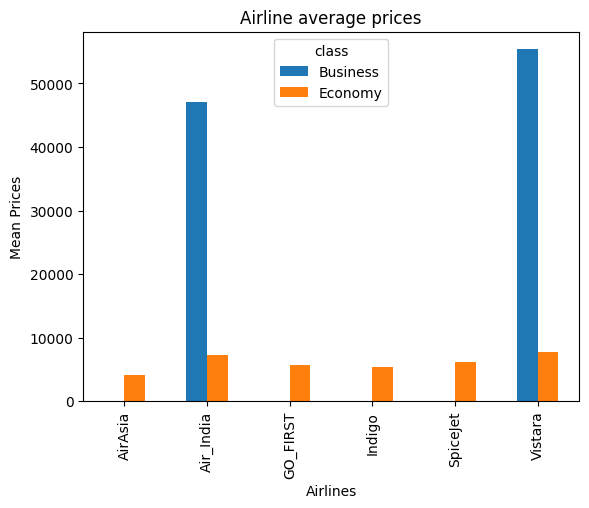

In [15]:
airline_mean_prices = df.groupby(['airline', 'class'])['price'].mean().unstack()
print(airline_mean_prices)

airline_mean_prices.plot(kind='bar')
plt.title("Airline average prices")
plt.xlabel("Airlines")
plt.ylabel("Mean Prices")
plt.show()

- Business class only exists for Air India and Vistara.
- Business class mean prices for Air India and Vistara are the highest. This also explains why Air India and Vistara have the highest number of departures in any city.
- A conclusion can be made that these highest number of departures from Air India and Vistara are due to businessman travelling between cities.

### How is the price affected when booked over the days before the flight?

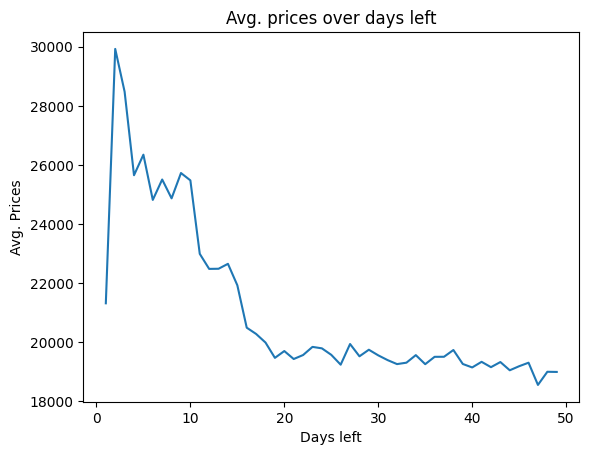

In [16]:
df.groupby('days_left')['price'].mean().plot()

plt.title("Avg. prices over days left")
plt.xlabel("Days left")
plt.ylabel("Avg. Prices")
plt.show()

- It is observed that as one moves closer to the flight time, flight prices increases heavily
- It is also observed that the prices are much cheaper if booked as early as possible.

### Does the ticket price change based on the departure time and arrival time?

airline             AirAsia     Air_India     GO_FIRST       Indigo  \
departure_time                                                        
Afternoon       4342.759584  23789.167617  5482.280858  5666.364943   
Early_Morning   4527.002979  23346.060200  5659.073079  5203.600440   
Evening         4058.764561  23366.248792  5604.052610  4813.684870   
Late_Night      4183.125874  26479.151203  4806.554795  4317.195592   
Morning         4132.566865  21747.785007  6500.995870  5904.384736   
Night           3343.718239  25968.716429  4861.946995  4324.235380   

airline            SpiceJet       Vistara  
departure_time                             
Afternoon       7720.376362  28630.575866  
Early_Morning   5813.590543  29956.291223  
Evening         5720.595273  30986.324400  
Late_Night              NaN           NaN  
Morning         6894.052008  30512.432162  
Night           5533.119481  30978.319882  


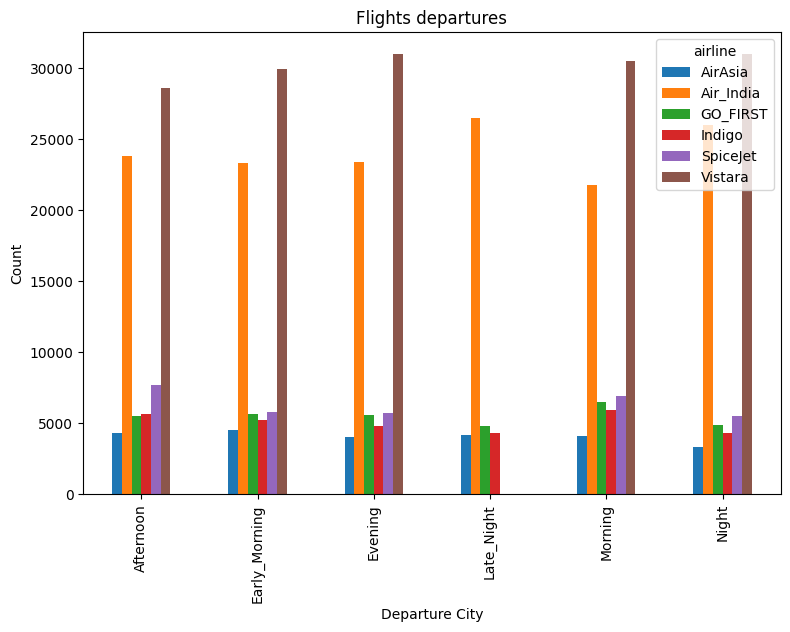

In [17]:
departure_time_prices = df.groupby(['departure_time', 'airline'])['price'].mean()
departure_time_prices = departure_time_prices.unstack()
print(departure_time_prices)

departure_time_prices.plot(figsize=(9,6), kind='bar')
plt.title("Flights departures")
plt.xlabel("Departure City")
plt.ylabel("Count")
plt.show()

- SpiceJet and Vistara donot operate on late night
- Late Night flights are generally cheaper
- Morning and Afternoon flights are generally relatively expensive

## One-Hot Encoding & Integer Encoding

- A mixed approach of one-hot encoding and integer encoding is used
- one-hot encoding is used for categorical features like source_city, destination_city
- integer encoding is used for categorical features like airline, class, departure_time, arrival_time, stops
- the reason airline is considered for integer encoding is because different airlines affect the prices according to their ranks.
- class is also cosidered for integer encoding due to obvious reason that business class is always higher in rank than economy.
- flight is not considered in the model

In [18]:
oh_encoded_features = pd.get_dummies(df[['source_city', 'destination_city']], dtype='int')
oh_encoded_features

label_encoder = LabelEncoder()
label_encoder_maps = []
df['departure_time'] = label_encoder.fit_transform(df['departure_time'])
label_encoder_maps.append(dict(zip(range(0, len(label_encoder.classes_)), label_encoder.inverse_transform(range(0, len(label_encoder.classes_))))))

df['arrival_time'] = label_encoder.fit_transform(df['arrival_time'])
label_encoder_maps.append(dict(zip(range(0, len(label_encoder.classes_)), label_encoder.inverse_transform(range(0, len(label_encoder.classes_))))))

df['stops'] = label_encoder.fit_transform(df['stops'])
label_encoder_maps.append(dict(zip(range(0, len(label_encoder.classes_)), label_encoder.inverse_transform(range(0, len(label_encoder.classes_))))))

df['class'] = label_encoder.fit_transform(df['class'])
label_encoder_maps.append(dict(zip(range(0, len(label_encoder.classes_)), label_encoder.inverse_transform(range(0, len(label_encoder.classes_))))))

df['airline'] = label_encoder.fit_transform(df['airline'])
label_encoder_maps.append(dict(zip(range(0, len(label_encoder.classes_)), label_encoder.inverse_transform(range(0, len(label_encoder.classes_))))))

df_encoded = pd.concat([df, oh_encoded_features], axis=1)
df_encoded = df_encoded.drop(columns=['flight', 'source_city', 'destination_city'], axis=1)

In [19]:
#pickle all encoded maps
for i, filename in enumerate(['departure_time_map', 'arrival_time_map', 'stops_map', 'class_map', 'airline_map']):
    with open(f"../output/{filename}.pkl", "wb") as f:
        pickle.dump(label_encoder_maps[i], f)

## Correlation Analysis

In [20]:
df_encoded

airline  departure_time  stops  arrival_time  class  duration  \
0             4               2      2             5      1      2.17   
1             4               1      2             4      1      2.33   
2             0               1      2             1      1      2.17   
3             5               4      2             0      1      2.25   
4             5               4      2             4      1      2.33   
...         ...             ...    ...           ...    ...       ...   
300148        5               4      0             2      0     10.08   
300149        5               0      0             5      0     10.42   
300150        5               1      0             5      0     13.83   
300151        5               1      0             2      0     10.00   
300152        5               4      0             2      0     10.08   

        days_left  price  source_city_Bangalore  source_city_Chennai  \
0               1   5953                      0                    0   
1               1   5953                      0                    0   
2               1   5956                      0                    0   
3               1   5955                      0                    0   
4               1   5955                      0                    0   
...           ...    ...                    ...                  ...   
300148         49  69265                      0                    1   
300149         49  77105                      0                    1   
300150         49  79099                      0                    1   
300151         49  81585                      0                    1   
300152         49  81585                      0                    1   

        source_city_Delhi  source_city_Hyderabad  source_city_Kolkata  \
0                       1                      0                    0   
1                       1                      0                    0   
2                       1                      0                    0   
3                       1                      0                    0   
4                       1                      0                    0   
...                   ...                    ...                  ...   
300148                  0                      0                    0   
300149                  0                      0                    0   
300150                  0                      0                    0   
300151                  0                      0                    0   
300152                  0                      0                    0   

        source_city_Mumbai  destination_city_Bangalore  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   
...                    ...                         ...   
300148                   0                           0   
300149                   0                           0   
300150                   0                           0   
300151                   0                           0   
300152                   0                           0   

        destination_city_Chennai  destination_city_Delhi  \
0                              0                       0   
1                              0                       0   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
300148                         0                       0   
300149                         0                       0   
300150                         0                       0   
300151                         0                       0   
300152                         0

In [21]:
corr = df_encoded.corr()
corr['price']

airline                       0.242520
departure_time                0.058150
stops                        -0.203079
arrival_time                  0.041829
class                        -0.938672
duration                      0.204348
days_left                    -0.090241
price                         1.000000
source_city_Bangalore         0.012243
source_city_Chennai           0.018576
source_city_Delhi            -0.043465
source_city_Hyderabad        -0.012333
source_city_Kolkata           0.015466
source_city_Mumbai            0.013194
destination_city_Bangalore    0.013937
destination_city_Chennai      0.018631
destination_city_Delhi       -0.052607
destination_city_Hyderabad   -0.008057
destination_city_Kolkata      0.020933
destination_city_Mumbai       0.010399
Name: price, dtype: float64

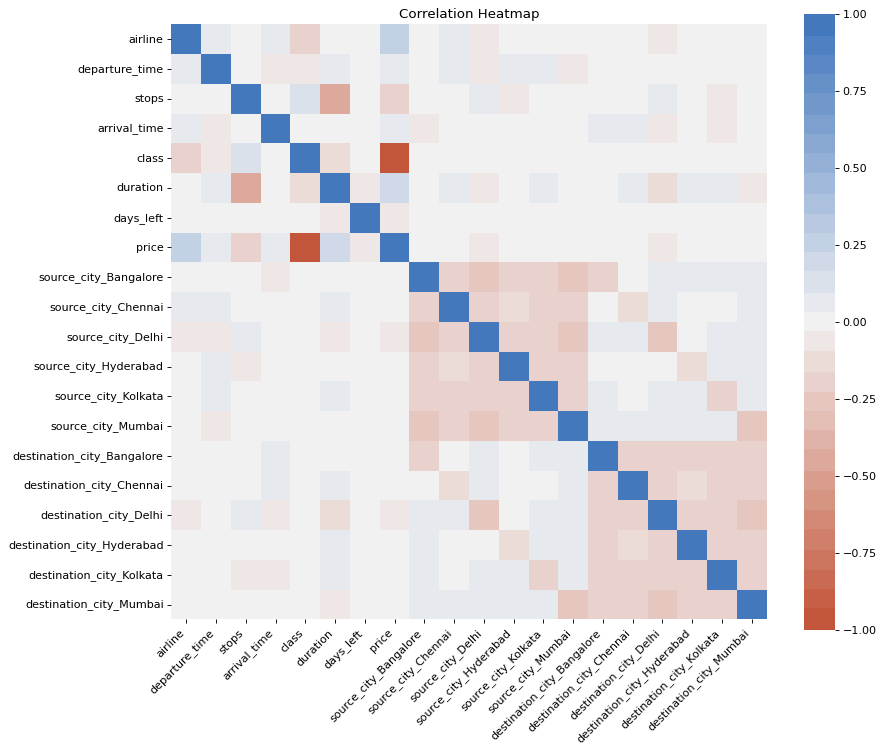

In [22]:
plt.figure(figsize=(12, 10), dpi=80)
plt.title("Correlation Heatmap")

hm = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 251, n=31), square=True)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

- There is definitely a pattern seen in the correlation heat map.
- There are still lots of features that exhibit multicollinearity
- The correlation heat map shows clear pattern that features related to source and destination are collinear.
- Do we really need source and destination features ? Do these features affect the price much ?

### Does prices depend on source city ?

source_city
Bangalore    21459.987821
Chennai      21948.233880
Delhi        18913.571971
Hyderabad    20151.324331
Kolkata      21674.638780
Mumbai       21447.116250
Name: price, dtype: float64


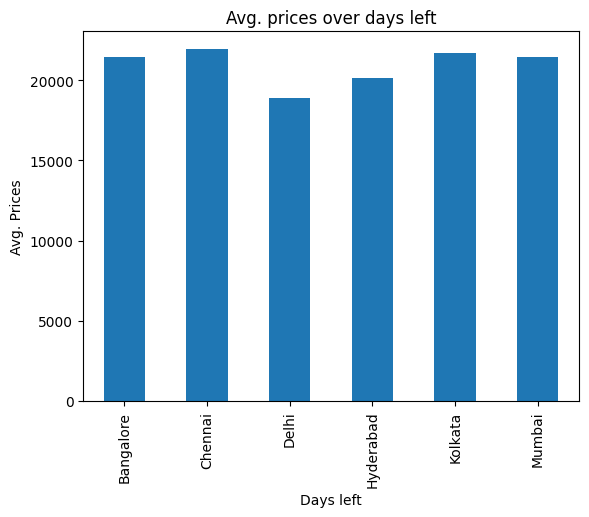

In [24]:
source_city_prices = df.groupby('source_city')['price'].mean()
print(source_city_prices)

source_city_prices.plot(kind='bar')

plt.title("Avg. prices over days left")
plt.xlabel("Days left")
plt.ylabel("Avg. Prices")
plt.show()

### Does prices depend on destination city ?

destination_city
Bangalore    21551.930430
Chennai      21924.969817
Delhi        18404.952947
Hyderabad    20407.425719
Kolkata      21921.040415
Mumbai       21330.573738
Name: price, dtype: float64


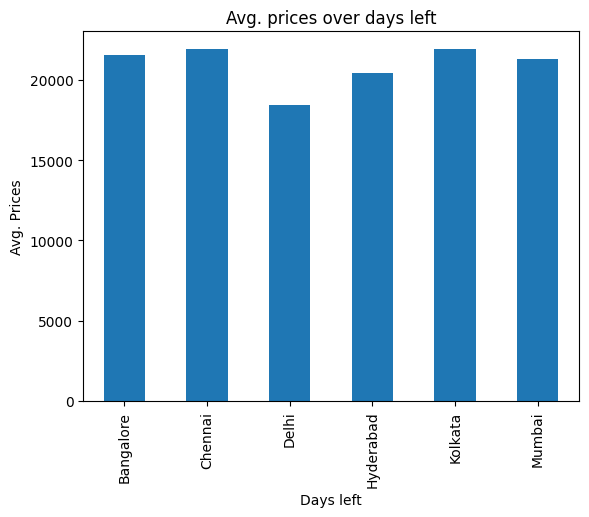

In [25]:
destination_city_prices = df.groupby('destination_city')['price'].mean()
print(destination_city_prices)

destination_city_prices.plot(kind='bar')

plt.title("Avg. prices over days left")
plt.xlabel("Days left")
plt.ylabel("Avg. Prices")
plt.show()

- From above analysis, it is observed that price is almost flat for both source and destination features.
- It is safe to exclude these features from the model.

In [26]:
df_encoded = df_encoded.drop(columns=['source_city_Bangalore', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'destination_city_Bangalore',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'], axis=1)

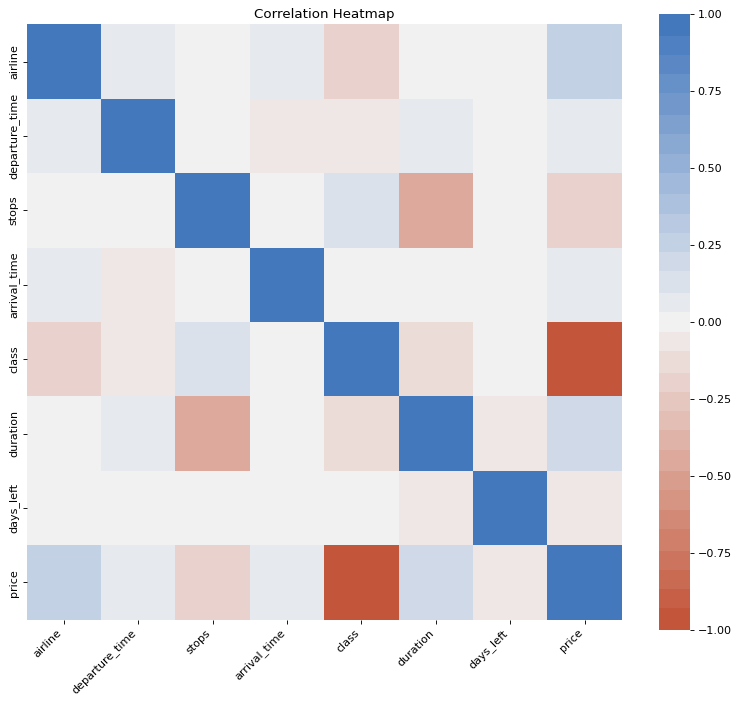

In [27]:
corr = df_encoded.corr()

plt.figure(figsize=(12, 10), dpi=80)
plt.title("Correlation Heatmap")

hm = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 251, n=31), square=True)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## VIF Analysis

In [28]:
df_2 = df_encoded.copy()

In [29]:
vif_df = pd.DataFrame()
vif_df["feature"] = df_2.columns
vif_df["vif"] = [variance_inflation_factor(df_2.values, i) for i in range(df_2.shape[1])]

vif_df

feature       vif
0         airline  4.251658
1  departure_time  2.890537
2           stops  1.415954
3    arrival_time  4.033377
4           class  7.275274
5        duration  4.959065
6       days_left  4.052471
7           price  5.603589

The data set now seems to have no multicollinearity

## Train - Test Split

In [51]:
with open(f"../output/df_encoded.pkl", 'wb') as f:
    pickle.dump(df_encoded, f)

In [30]:
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']/1000

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((240023, 7), (60006, 7), (240023,), (60006,))

In [31]:
x_train_with_intercept = sm.add_constant(x_train)
x_train_with_intercept

const  airline  departure_time  stops  arrival_time  class  duration  \
213025    1.0        1               0      0             4      0     20.67   
262140    1.0        5               0      2             2      0      2.42   
57720     1.0        0               5      2             5      1      1.92   
112996    1.0        1               1      0             5      1     17.42   
86114     1.0        5               4      0             2      1      5.00   
...       ...      ...             ...    ...           ...    ...       ...   
99196     1.0        1               2      0             0      1     18.00   
169192    1.0        1               4      0             5      1      8.75   
57957     1.0        2               1      0             0      1      8.00   
183649    1.0        3               0      0             3      1      9.33   
227341    1.0        1               5      2             5      0      2.25   

        days_left  
213025         15  
262140         17  
57720          29  
112996         29  
86114          12  
...           ...  
99196          30  
169192         36  
57957          30  
183649         25  
227341         25  

[240023 rows x 8 columns]

## Linear Regression - OLS

In [32]:
model = sm.OLS(y_train, x_train_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 3.298e+05
Date:                Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                        09:18:06   Log-Likelihood:            -8.0593e+05
No. Observations:              240023   AIC:                         1.612e+06
Df Residuals:                  240015   BIC:                         1.612e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             51.1360      0.066    774.825      0.000      51.007      51.265
airline            0.9360      0.008    118.686      0.000       0.920       0.951
departure_time     0.0324      0.008      3.979      0.000       0.016       0.048
stops             -3.2839      0.024   -135.356      0.000      -3.331      -3.236
arrival_time       0.1926      0.008     23.577      0.000       0.177       0.209
class            -44.5062      0.032  -1412.808      0.000     -44.568     -44.444
duration           0.0909      0.002     40.172      0.000       0.086       0.095
days_left         -0.1297      0.001   -123.762      0.000      -0.132      -0.128
==============================================================================
Omnibus:                    26844.347   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           211676.001
Skew:                           0.246   Prob(JB):                         0.00
Kurtosis:                       7.574   Cond. No.                         153.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This seems to be a great model with $R^2$ and Adj. $R^2$ at 90.6%

## Prediction

In [33]:
x_test_with_intercept = sm.add_constant(x_test)
y_pred = model.predict(x_test_with_intercept)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r_squared)

Mean Squared Error: 47.98710649680085
Root Mean Squared Error: 6.927272659337212
Mean Absolute Error: 4.6020025318060505
R-squared: 0.9060753898710524


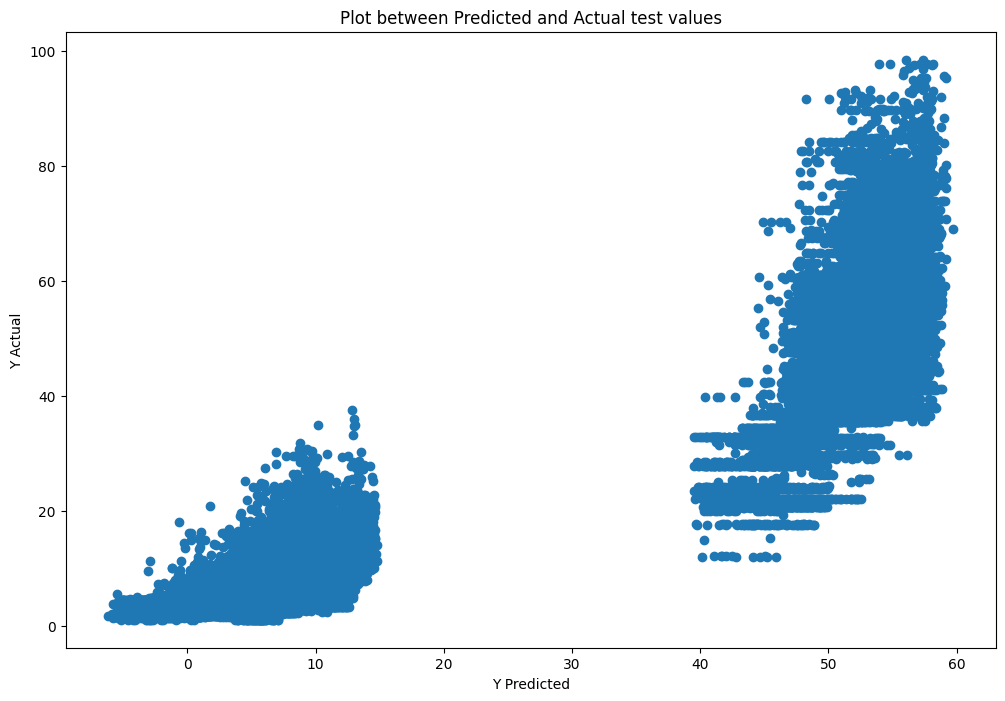

In [34]:
x_test_with_intercept = sm.add_constant(x_test)
y_test_predicted = model.predict(x_test_with_intercept)

plt.figure(figsize=(12, 8))
plt.scatter(y_test_predicted, y_test)
plt.xlabel("Y Predicted")
plt.ylabel("Y Actual")
plt.title("Plot between Predicted and Actual test values")
plt.show()

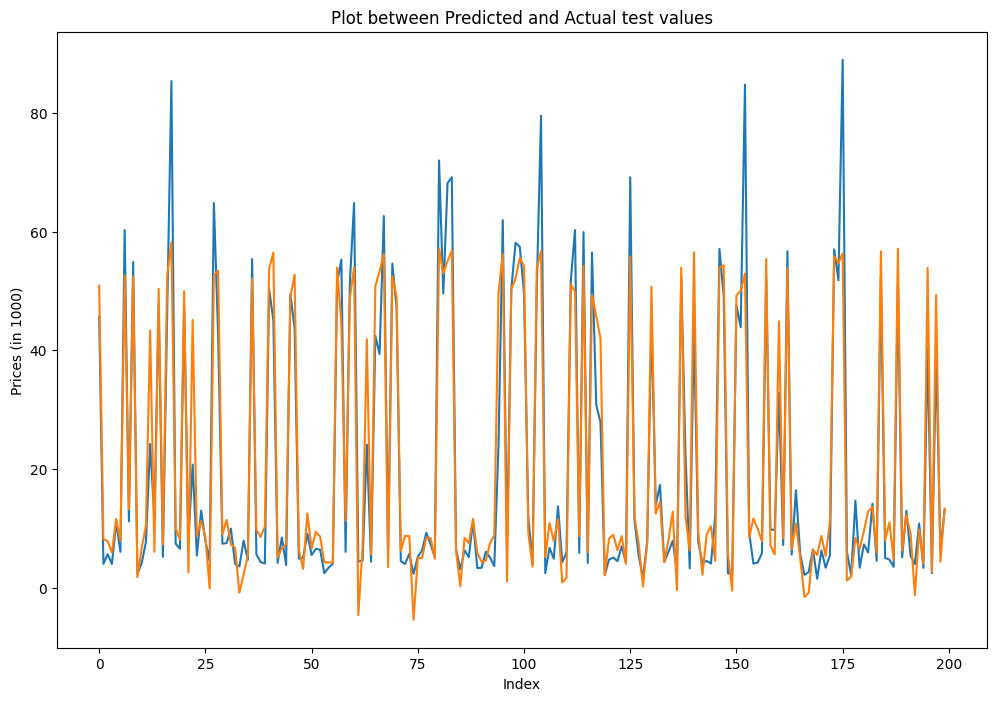

In [35]:
x_test_with_intercept = sm.add_constant(x_test)
y_test_predicted = model.predict(x_test_with_intercept)

plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(y_test[:200])), y_test[:200])
plt.plot(np.arange(len(y_test_predicted[:200])), y_test_predicted[:200])
plt.xlabel("Index")
plt.ylabel("Prices (in 1000)")
plt.title("Plot between Predicted and Actual test values")
plt.show()

In [36]:
y_test_predicted.corr(y_test)

0.9518808707526133

- The model performs well on test dataset
- There is a 95% correlation between actual test data and predicted test data

In [37]:
coefficients = model.params
coefficients = coefficients[1:]

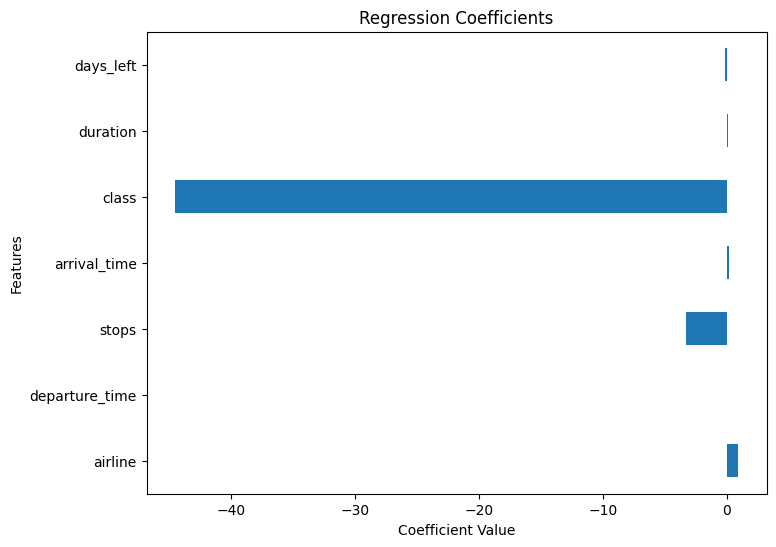

In [38]:
plt.figure(figsize=(8, 6))
coefficients.plot(kind='barh')
plt.title('Regression Coefficients')
plt.ylabel('Features')
plt.xlabel('Coefficient Value')
plt.show()

In [39]:
#Save model
joblib.dump(model, '../output/model.sav')

['../output/model.sav']